In [1]:
import pandas as pd
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"


In [2]:
tmp = pd.read_html(url,match="Регіон",decimal=",",thousands='')

df = tmp[0]


In [3]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [4]:
df.shape

(28, 9)

In [5]:
df = df.replace("—","NaN")

In [6]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [7]:
df = df.astype({"2019":"float64", "2014":"float64"})

df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [8]:
df.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [9]:
df.drop(df.tail(1).index,inplace=True)

In [10]:
df.fillna(df.mean(numeric_only=True),inplace=True)


In [11]:
avarage = df["2019"].mean()

more_than_avarage = df.loc[df["2019"] > avarage,["Регіон","2019"]]
print(more_than_avarage)

               Регіон  2019
2           Волинська  10.1
6        Закарпатська  10.4
8   Івано-Франківська   8.8
12          Львівська   8.7
14            Одеська   8.8
16         Рівненська  10.7
20         Херсонська   8.1
23        Чернівецька   9.2
25               Київ  11.0


In [12]:
max_birth= df["2014"].max()

max_birth_region = df.loc[df["2014"] == max_birth,["Регіон","2014"]]
print(max_birth_region)

        Регіон  2014
16  Рівненська  14.8


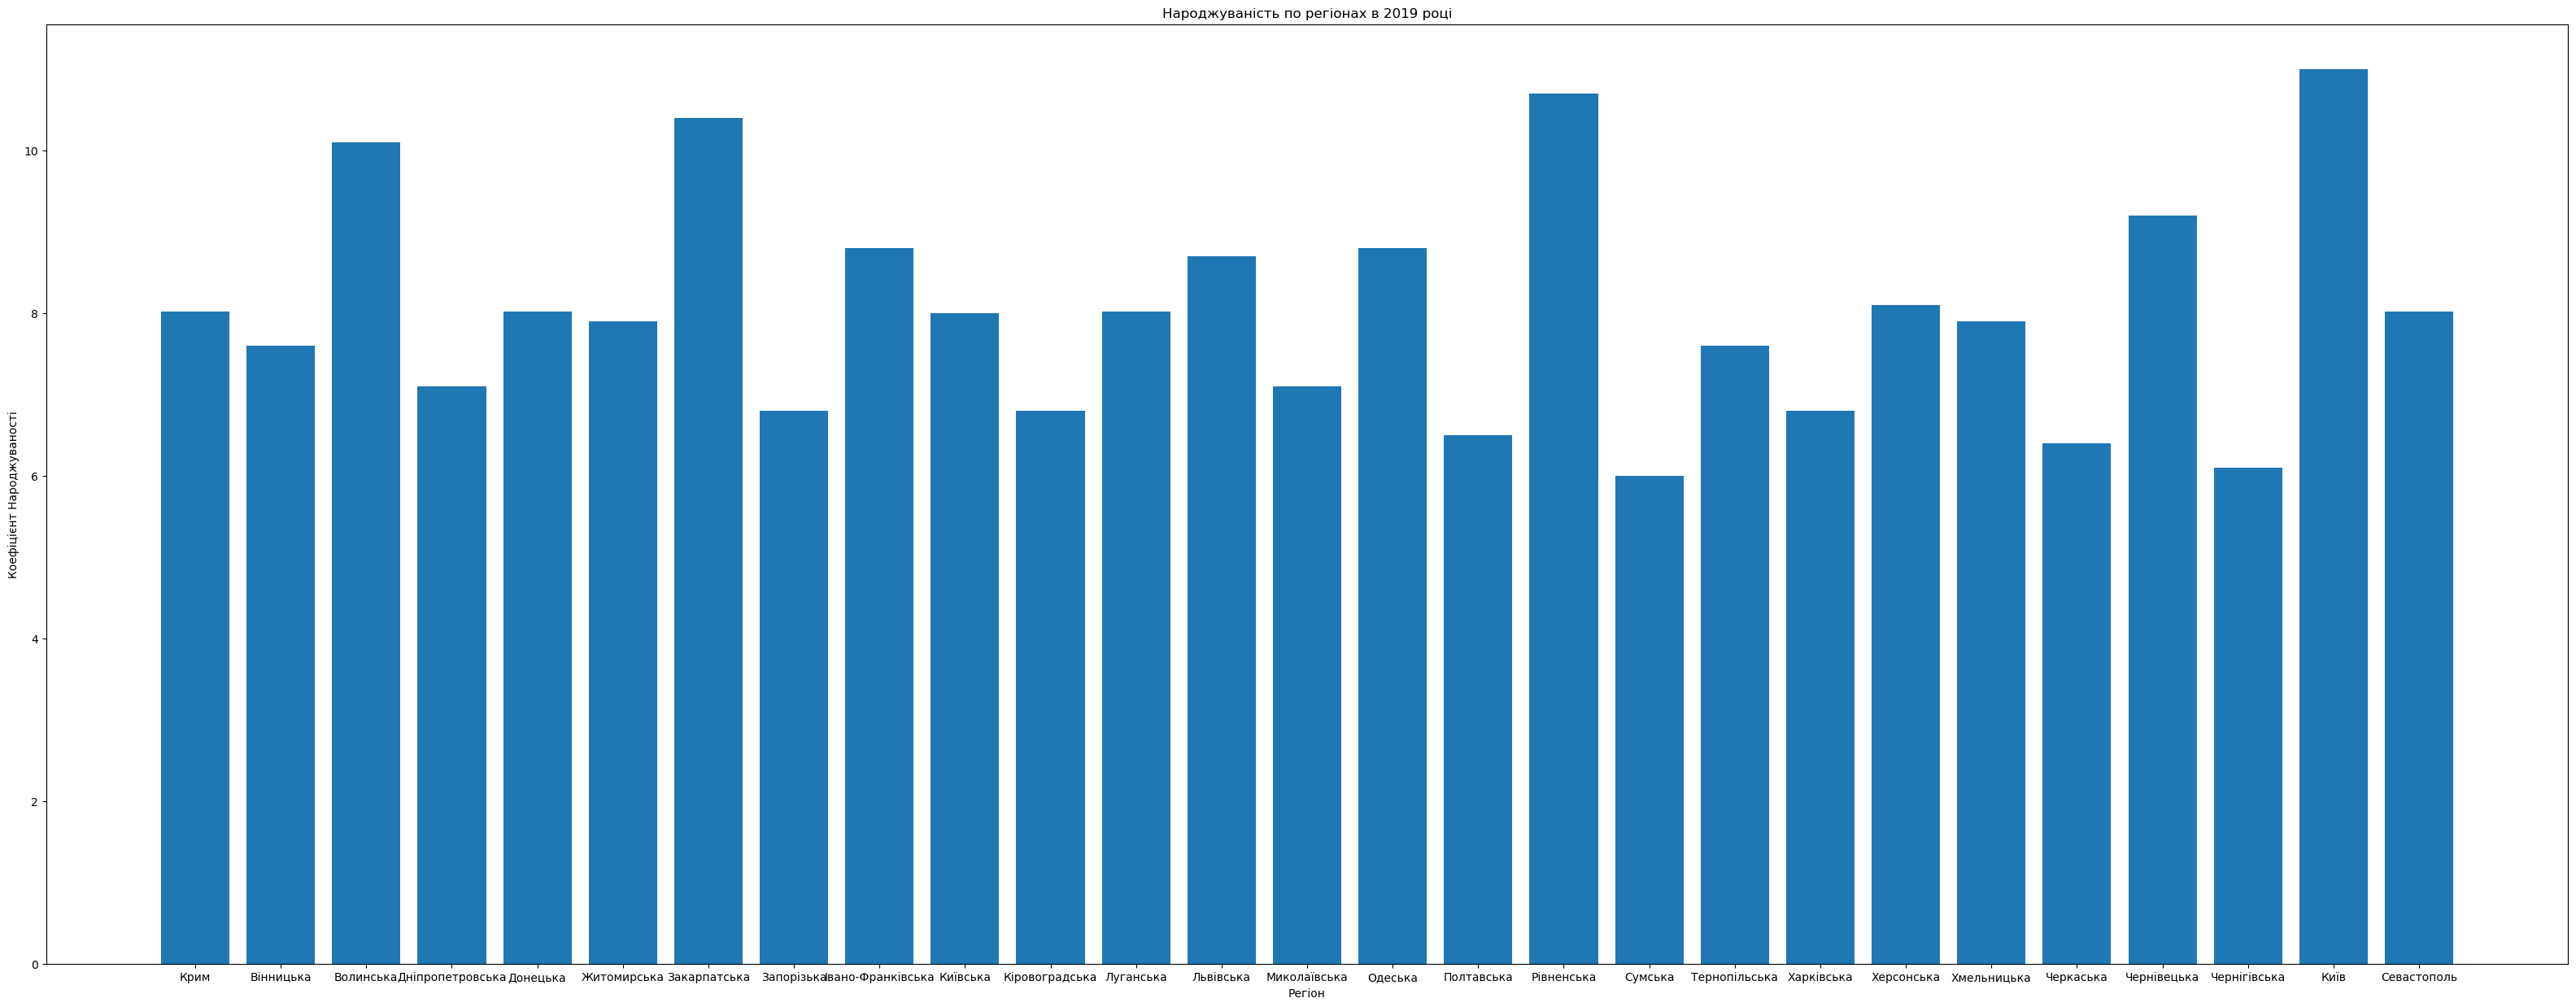

In [13]:
import matplotlib.pyplot as plt

df_2019 = df.loc[:,["Регіон","2019"]]

plt.figure(figsize=(40, 15))
plt.bar(df_2019["Регіон"],df_2019["2019"])


plt.title('Народжуваність по регіонах в 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт Народжуваності')


plt.show()

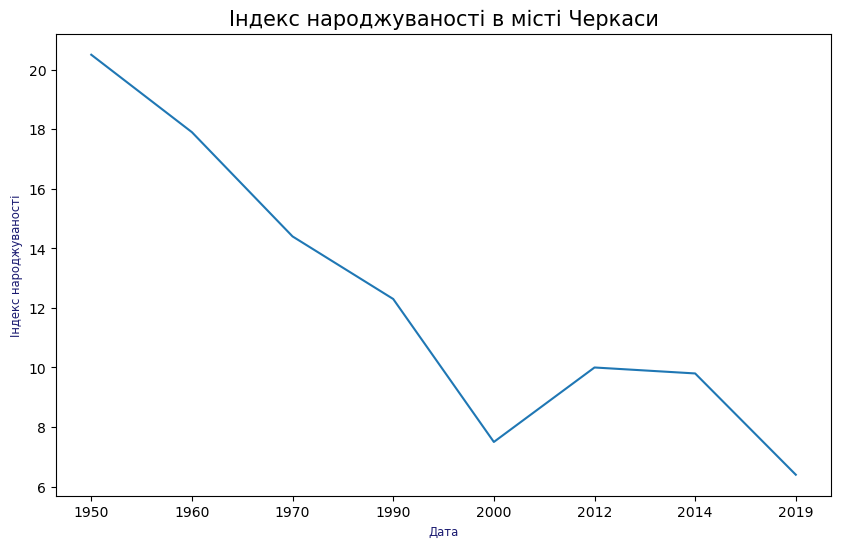

In [41]:
cherkasy_region = df.loc[df["Регіон"] == "Черкаська"]
cherkasy_region = cherkasy_region.loc[:,"1950":]
index = cherkasy_region.iloc[0]
years = cherkasy_region.columns
plt.figure(figsize=(10, 6))
plt.xlabel('Дата', fontsize='small', color='midnightblue')
plt.ylabel('Індекс народжуваності', fontsize='small', color='midnightblue')
plt.title('Індекс народжуваності в місті Черкаси', fontsize=15)
plt.plot(years,index)
plt.show()


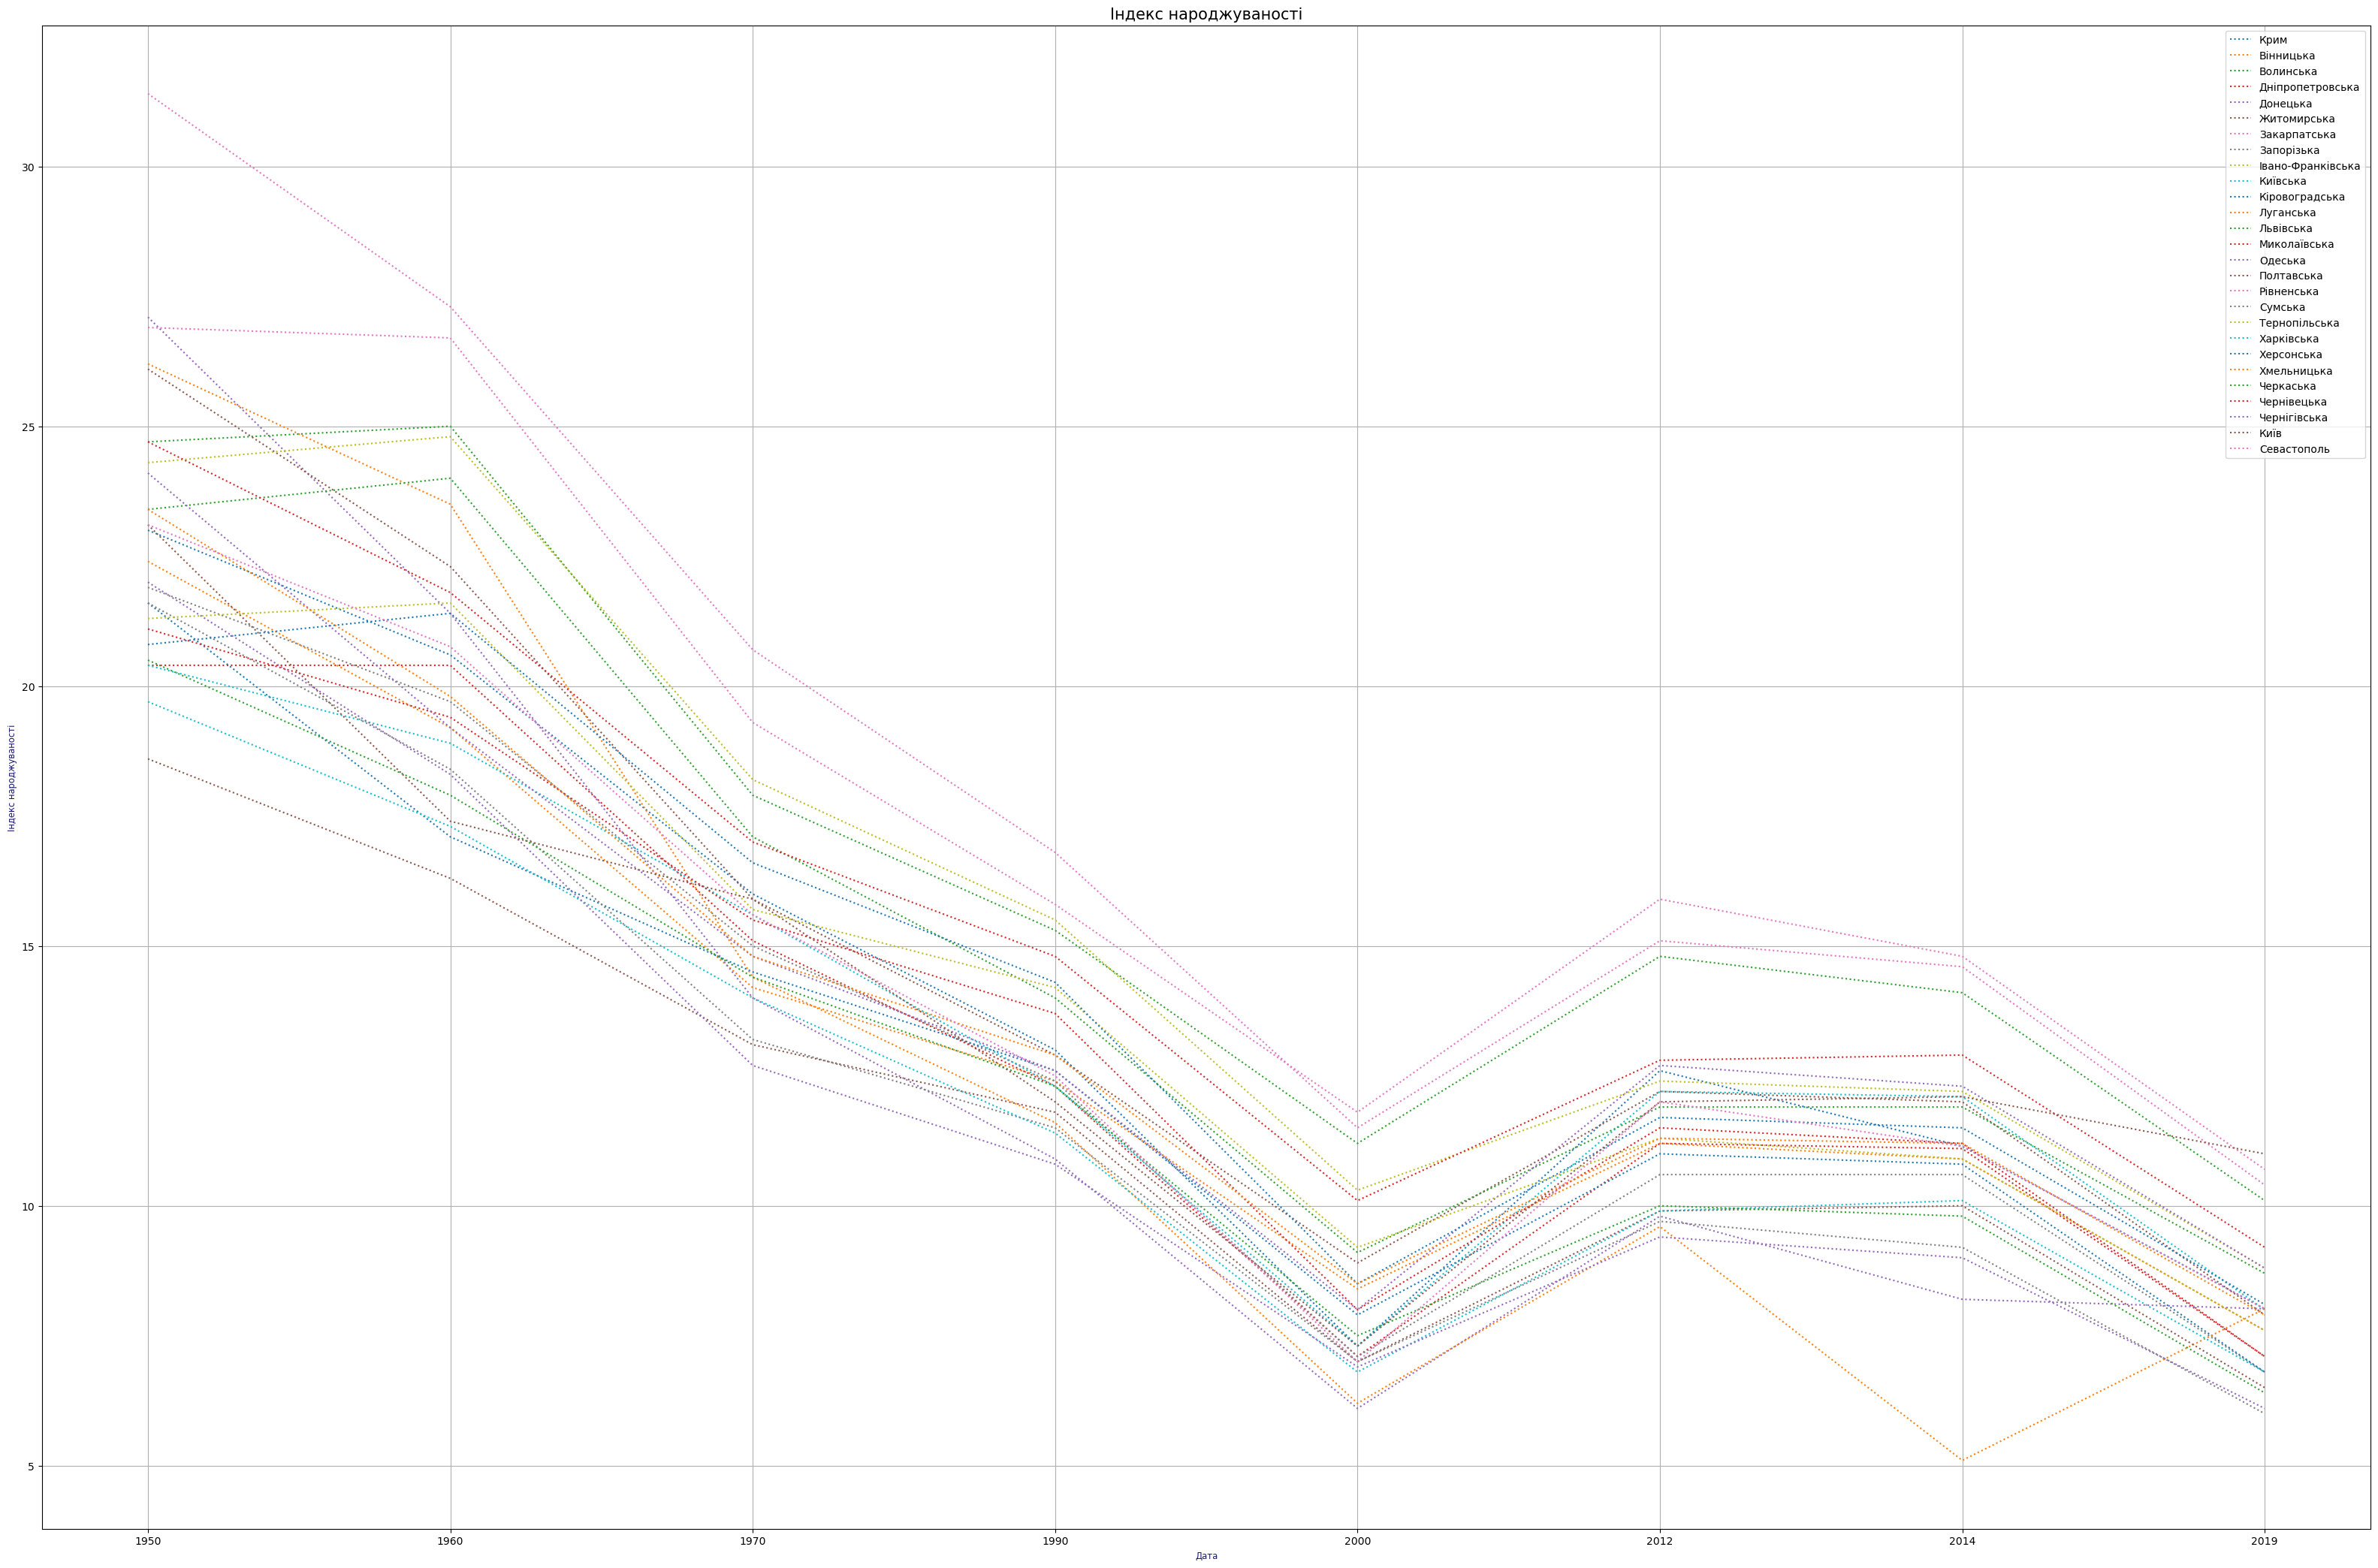

In [72]:
df2 = df.set_index('Регіон')
df2 = df2.transpose()
plt.figure(figsize=(40, 26))
plt.xlabel('Дата', fontsize='small', color='midnightblue')
plt.ylabel('Індекс народжуваності', fontsize='small', color='midnightblue')
plt.title('Індекс народжуваності', fontsize=15)
plt.grid()
plt.plot(df2,linestyle=":")
plt.legend(df2)
plt.show()